In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras import layers, models

# Image Compression
input_path = 'input.jpeg'
output_path_jpeg = 'compressed.jpg'
output_path_png = 'compressed.png'
quality_jpeg = 50
quality_png = 9

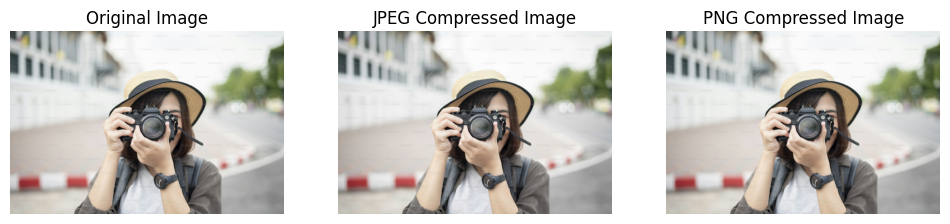

In [ ]:
img = cv2.imread(input_path)
cv2.imwrite(output_path_jpeg, img, [int(cv2.IMWRITE_JPEG_QUALITY), quality_jpeg])
cv2.imwrite(output_path_png, img, [int(cv2.IMWRITE_PNG_COMPRESSION), quality_png])

# Display Original and Compressed Images
original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
jpeg_compressed = cv2.cvtColor(cv2.imread(output_path_jpeg), cv2.COLOR_BGR2RGB)
png_compressed = cv2.cvtColor(cv2.imread(output_path_png), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(original)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(jpeg_compressed)
plt.title("JPEG Compressed Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(png_compressed)
plt.title("PNG Compressed Image")
plt.axis("off")

plt.show()

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8370 - loss: 0.5647 - val_accuracy: 0.9825 - val_loss: 0.0576
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9805 - loss: 0.0617 - val_accuracy: 0.9860 - val_loss: 0.0437
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9860
Precision: 0.9864
Recall: 0.9859
F1-Score: 0.9861
Confusion Matrix:
 [[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   2   13 1004    0    4    0    2    4    3    0]
 [   0    1    2  997    0    3    0    5    2    0]
 [   0    1    0    0  979    0    0    0    0    2]
 [   1    0    0    5    1  877    4    1    2    1]
 [   4    4    0    0    2    1  947    0    0    0]
 [   0   11    4    0    0    0    0 1009    1    3]
 [   4    3    2    1    3    0    3    3  952    3]
 [   1    5    0    1   11    2    0    5    1  983]]


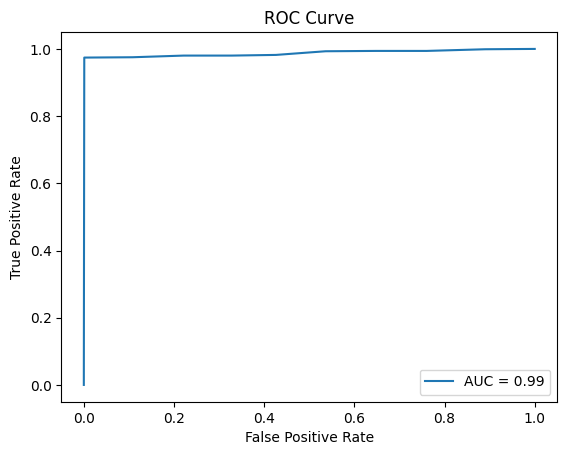

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support, accuracy_score
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# CNN Model for MNIST
model_mnist = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_mnist.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mnist.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))
y_pred = model_mnist.predict(x_test).argmax(axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=y_test.max())
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.3343 - loss: 1.7919 - val_accuracy: 0.5374 - val_loss: 1.2826
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5545 - loss: 1.2494 - val_accuracy: 0.5803 - val_loss: 1.1846
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6212 - loss: 1.0775 - val_accuracy: 0.6081 - val_loss: 1.1061
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6599 - loss: 0.9744 - val_accuracy: 0.6580 - val_loss: 0.9803
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6841 - loss: 0.9018 - val_accuracy: 0.6718 - val_loss: 0.9412
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7036 - loss: 0.8484 - val_accuracy: 0.6720 - val_loss: 0.9329
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7203 - loss: 0.7984 - val_accuracy: 0.6846 - val_loss: 0.9136
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7386 - loss: 0.7507 - val_accuracy: 0.

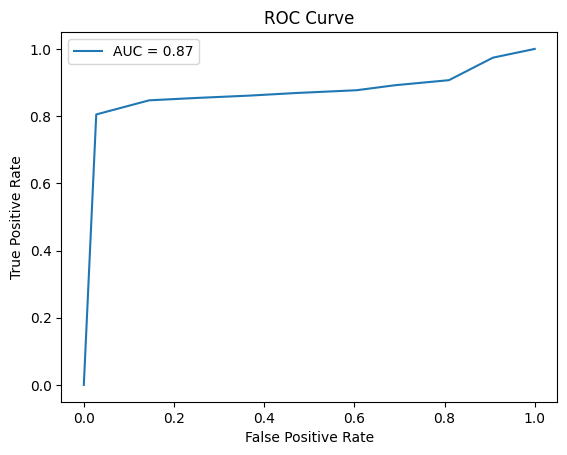

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# CNN Model for CIFAR-10
model_cifar10 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_cifar10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cifar10.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))
y_pred = model_cifar10.predict(x_test).argmax(axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=y_test.max())
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Improved CNN Model for CIFAR-10
model_cifar10 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_cifar10.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cifar10.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=20, validation_data=(x_test, y_test))

y_pred = model_cifar10.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=y_test.max())
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.2505 - loss: 2.0480 - val_accuracy: 0.3803 - val_loss: 1.7266
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.3873 - loss: 1.6469 - val_accuracy: 0.4135 - val_loss: 1.6760
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.5244 - loss: 1.3175 - val_accuracy: 0.6167 - val_loss: 1.0804
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6374 - loss: 1.0485 - val_accuracy: 0.6676 - val_loss: 0.9621
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6926 - loss: 0.9029 - val_accuracy: 0.6862 - val_loss: 1.0023
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.7380 - loss: 0.7820 - val_accuracy: 0.7554 - val_loss: 0.7426
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.7584 - loss: 0.7143 - val_accuracy: 0.7322 - val_loss: 0.8331
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7727 - loss: 0.6683 - val_accurac